<img src="https://devra.ai/analyst/notebook/1336/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Diabetes Data Exploration Notebook</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

This notebook explores a diabetes dataset originally prepared for a Power BI dashboard. The data includes features such as Age, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, and DiabetesPedigreeFunction. Although the dataset does not include an explicit outcome variable to predict the presence of diabetes, there is plenty to learn from a detailed exploratory data analysis. If you find this useful, please upvote it.

## Table of Contents

- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusion & Future Work](#Conclusion-&-Future-Work)

In [1]:
# Import needed libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # ensure Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is used

%matplotlib inline

import seaborn as sns

# Set a seaborn style
sns.set(style="whitegrid")

# Print a quick message to note that all imports were successful
print('Imports completed successfully.')

Imports completed successfully.


In [2]:
# Data Loading
import os

# Since the Excel file is in the same directory within the Kaggle input folder, we specify its path.
data_path = '/kaggle/input/diabetes-dashboard-power-bi/diabetes new.xlsx'

try:
    df = pd.read_excel(data_path)
    print(f"Data loaded successfully. DataFrame shape: {df.shape}")
except Exception as e:
    # If an error occurs (for example, file not found), note the resolution step
    print(f"Error loading the data: {e}")
    print("Ensure that the file exists in the specified directory and that the file name is correct.")

Data loaded successfully. DataFrame shape: (768, 8)


In [3]:
# Data Cleaning and Preprocessing
# Let's take a look at the first few rows and the summary of the dataset.
print('First five rows of the dataframe:')
display(df.head())

print('\nDataFrame Info:')
df.info()

# Checking for missing values
print('\nMissing values per column:')
display(df.isnull().sum())

# Since this dataset does not explicitly include any date features, there's no need for date parsing.
# However, it is always good practice to check data types. The numeric columns can be confirmed here.

# Convert columns to appropriate types if needed (in this case, they are already numeric as per the data description)
numeric_cols = ['Age', 'Pregnancies', 'Glucose', 'BloodPressure (mg/dL)', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print('\nSummary statistics:')
display(df[numeric_cols].describe())

First five rows of the dataframe:


,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,50,6,148,72,35,0,33.6,627.000
1,31,1,85,66,29,0,26.6,351.000
2,32,8,183,64,0,0,23.3,672.000
3,21,1,1,66,23,94,28.1,167.000
4,33,0,137,40,35,168,43.1,2.288



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure (mg/dL)     768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB

Missing values per column:


Age                         0
Pregnancies                 0
Glucose                     0
BloodPressure (mg/dL)       0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
dtype: int64


Summary statistics:


,Age,Pregnancies,Glucose,BloodPressure (mg/dL),SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,3.845052,120.779948,69.105469,20.536458,79.799479,31.992578,347.079349
std,11.760232,3.369578,32.243609,19.355807,15.952218,115.244002,7.884160,254.431659
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,24.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000
50%,29.000000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000
75%,41.000000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000
max,81.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000


Beginning Exploratory Data Analysis...


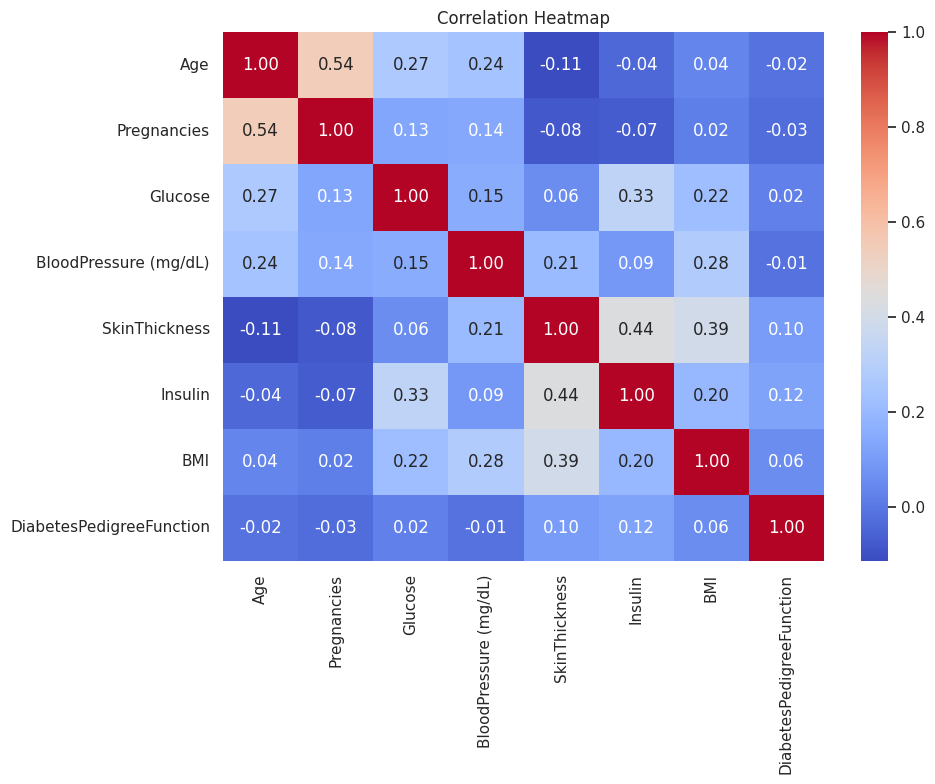

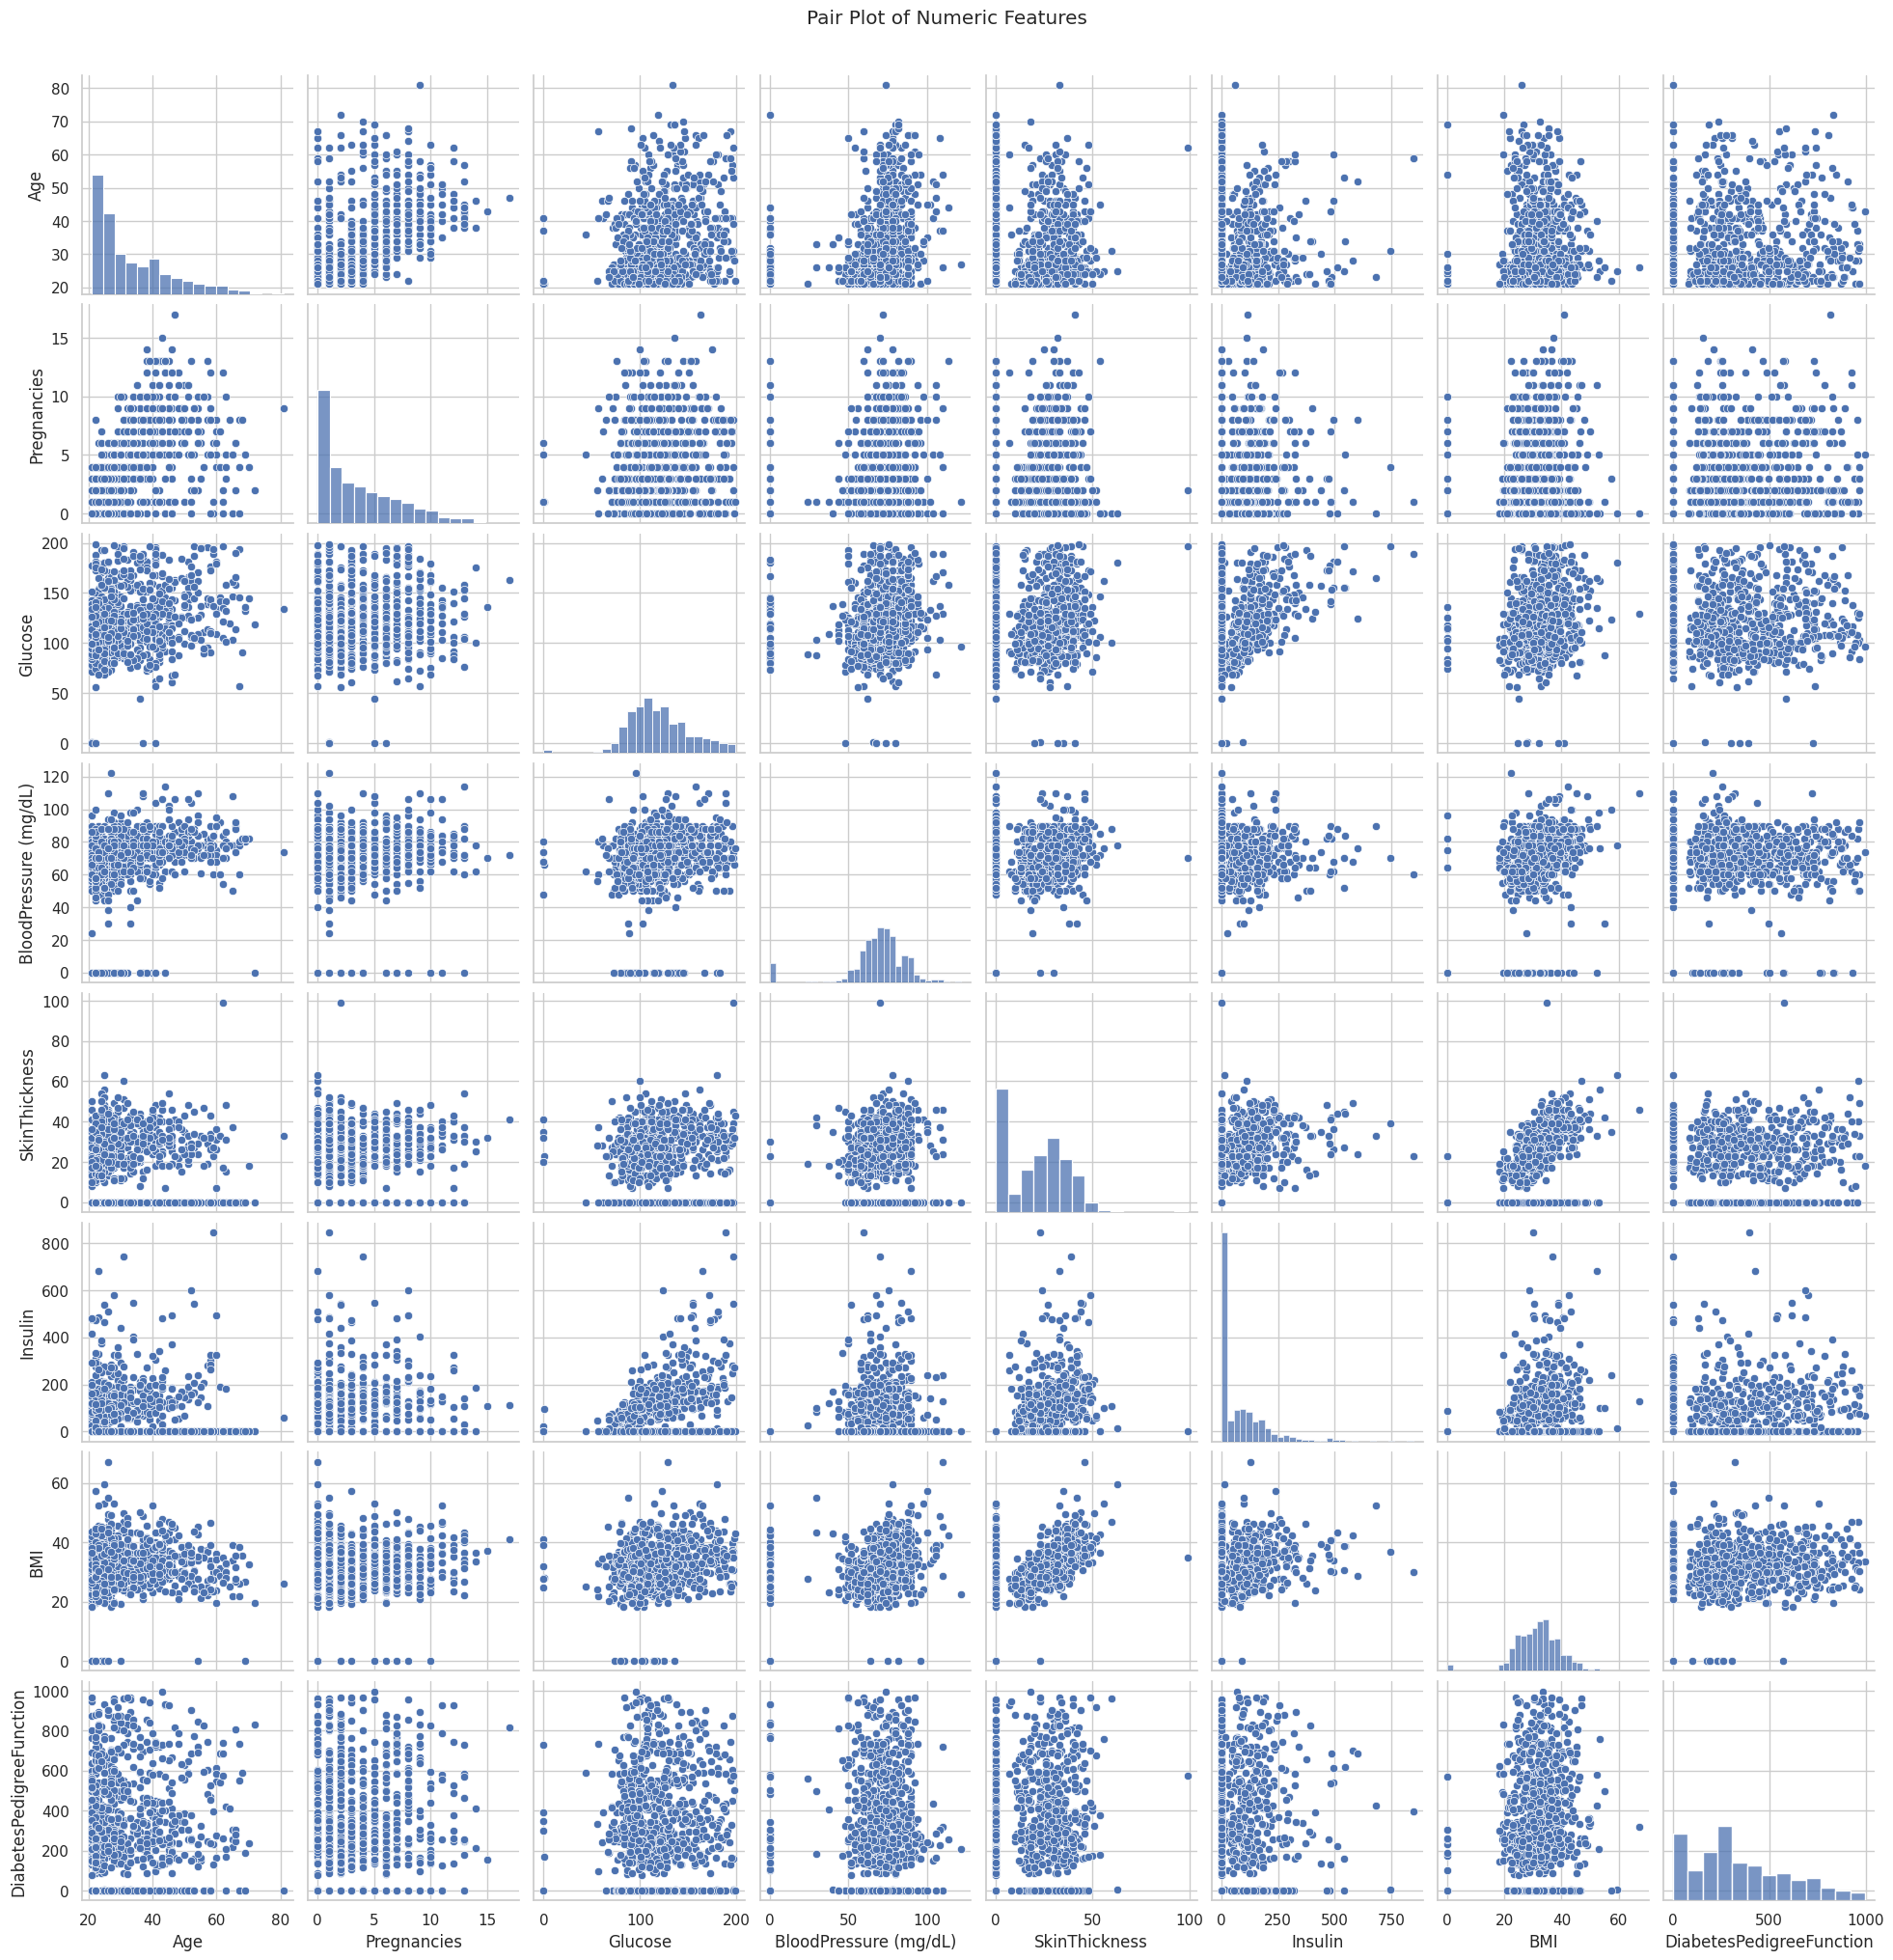

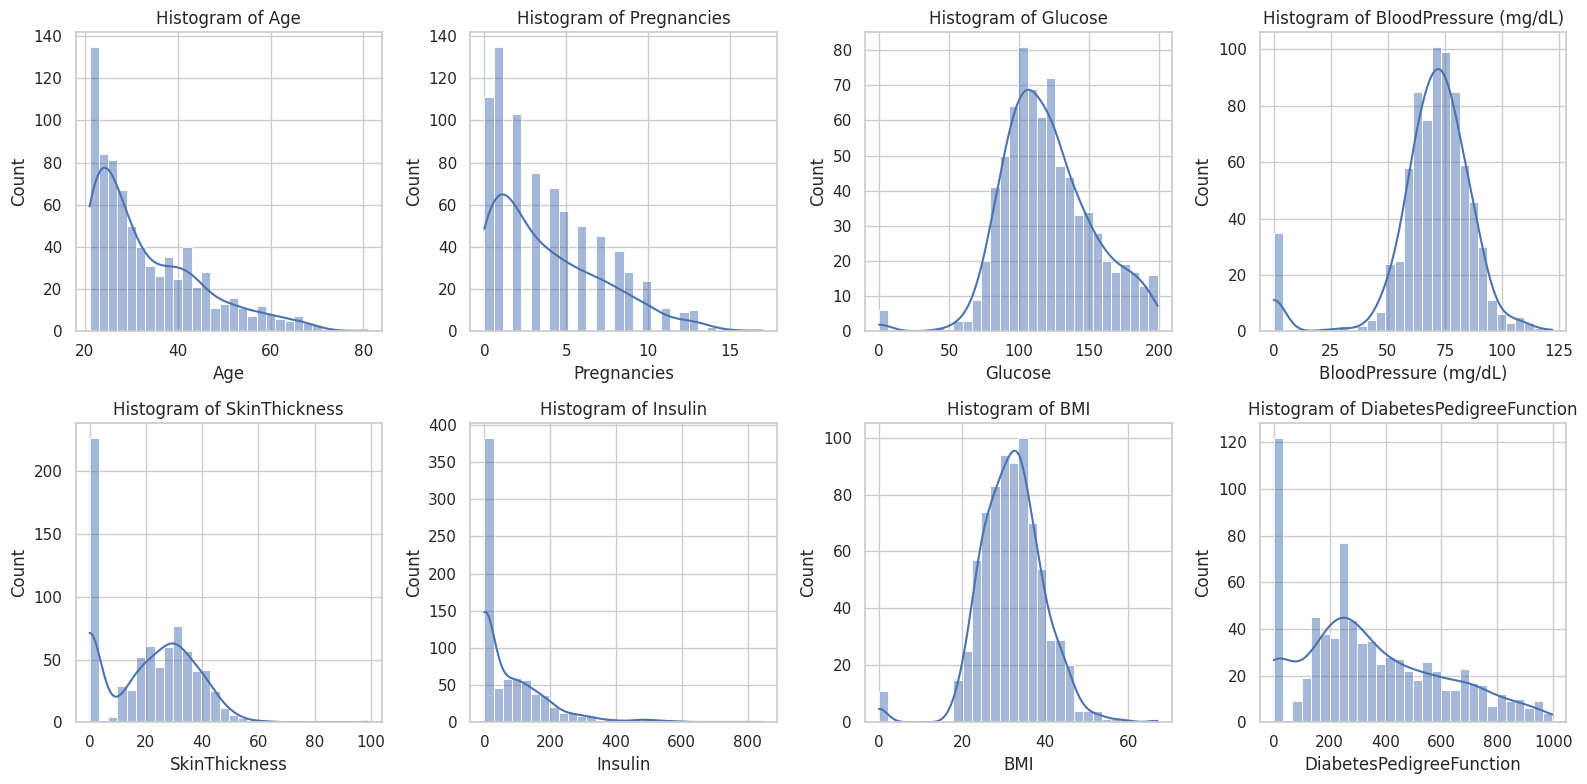

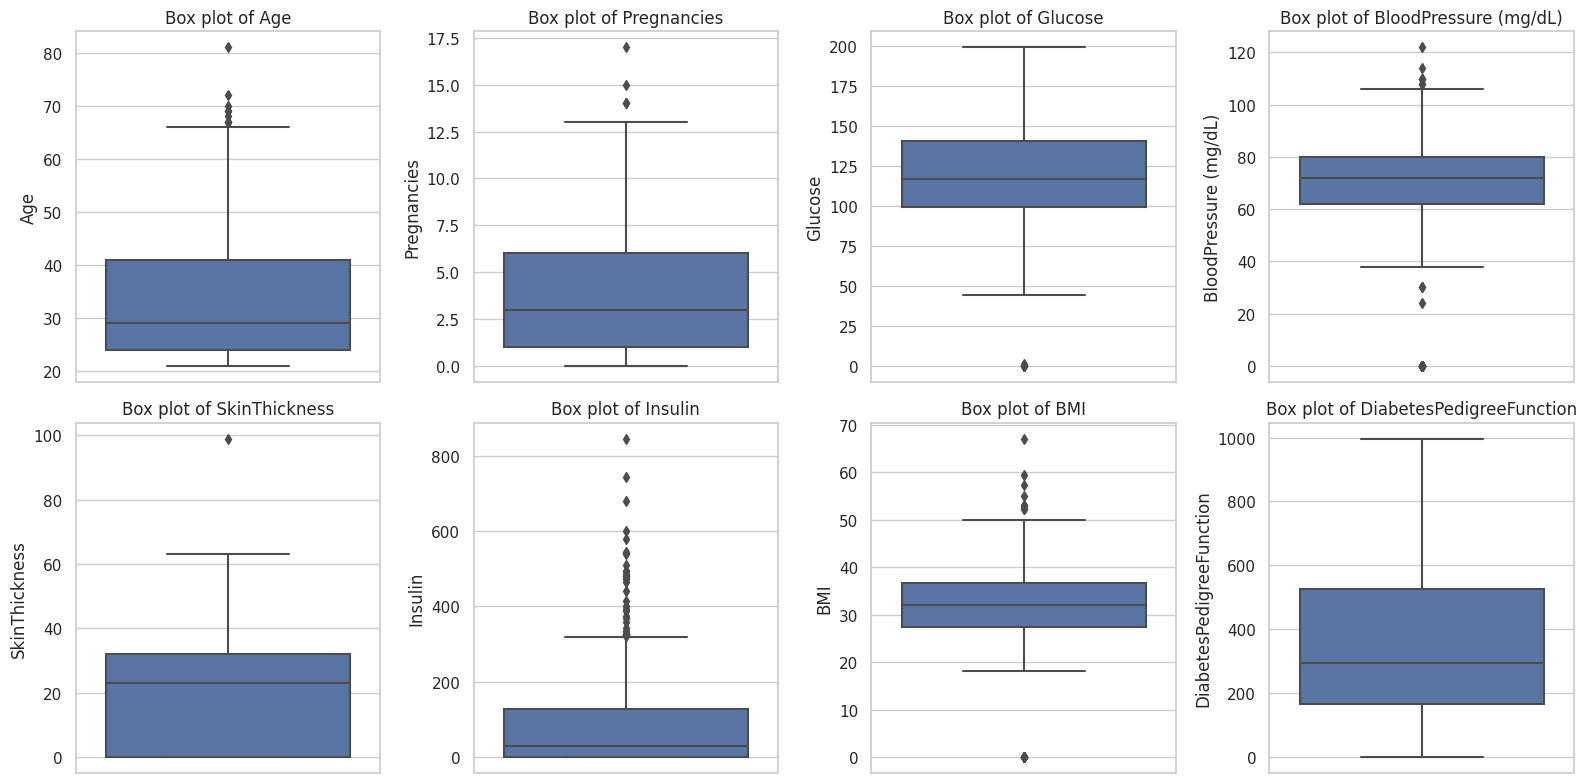

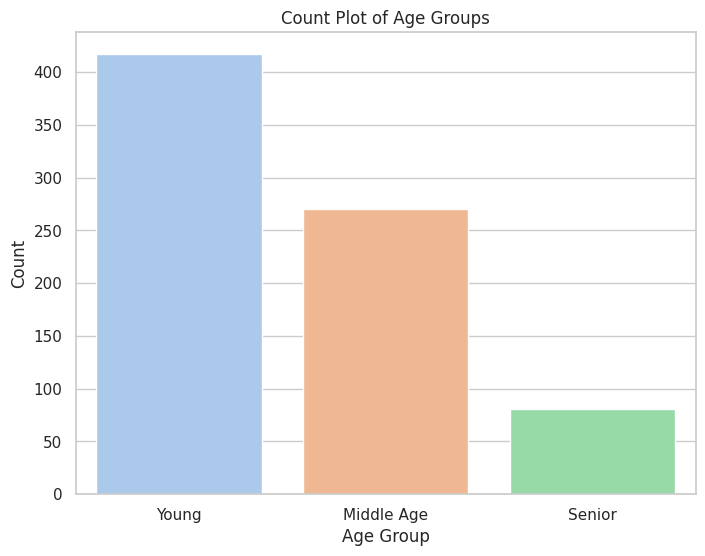

Exploratory Data Analysis completed.


In [4]:
# Exploratory Data Analysis
print('Beginning Exploratory Data Analysis...')

# Since all columns are numeric and we have 8 features, we can safely create a correlation heatmap.
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a meaningful correlation heatmap.')

# Create a pair plot to visualize relationships between pairs of variables.
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# Histograms for each numeric column to show distribution
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for idx, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), ax=axes[idx], kde=True, bins=30)
    axes[idx].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# For categorical visualizations, one might consider binned versions of continuous variables (if desired).
# For example, we can bin "Age" into categories and show a count plot.
df['Age_Group'] = pd.cut(df['Age'], bins=[df['Age'].min()-1, 30, 50, df['Age'].max()], labels=['Young', 'Middle Age', 'Senior'])
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df, palette='pastel')
plt.title('Count Plot of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Note: There is no designated target variable in this dataset, so no prediction model is created. 
# If a target were provided (e.g., Outcome for diabetes diagnosis), one might build a predictor here.
print('Exploratory Data Analysis completed.')

## Conclusion & Future Work

The analysis provided a variety of visualizations including a correlation heatmap, pair plot, histograms, and box plots to reveal the distributions, relationships, and potential outliers in the diabetes dataset. Although the dataset does not include an explicit target variable for predictive modelling, there remains ample opportunity to investigate regression tasks or even unsupervised clustering of the observations.

Future work could include:

- Investigating feature engineering techniques to create a surrogate outcome variable.
- Applying dimensionality reduction and clustering to identify patient subgroups.
- Integrating additional data sources (such as actual clinical outcomes) to build a predictive model for diabetes diagnosis.

This notebook laid the groundwork for further exploration and analysis. If you found this notebook useful, please consider upvoting it.